# Simulation Analyser

## Import relevant libraries

In [30]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
import quantstats as qs

## Get the data

In [31]:
config_file_name = "config_03_mix.ini"

### Simulation Results

In [32]:
file_import_sim_results = config_file_name.replace(".ini", ".csv")
fullpath_import_sim_results = os.path.join('../results', 'data', 'simul_results', 'sim_results_' + file_import_sim_results)

In [33]:
df_simulation_results = pd.read_csv(fullpath_import_sim_results)

In [34]:
fig = px.box(df_simulation_results, y="fmt_total_profit_percentage", color="model_type", points="all", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600)
fig.show()

In [35]:
fig = px.histogram(df_simulation_results, x="fmt_total_profit_percentage", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

In [36]:
fig = px.histogram(df_simulation_results, x="num_of_trades", color="model_type", color_discrete_sequence=[ "#FF7F0E", "#00CC96", "#10aded", "#8A56EF"],  width=800, height=600, marginal="rug", # can be `box`, `violin`
                         hover_data=['total_reward_cash','fmt_total_profit_percentage', 'num_of_trades', 'sim_id'])
fig.show()

### Robot Actions & Env data

In [37]:
sim_id = 3000

In [38]:
file_import_robot_actions_and_env = config_file_name.replace(".ini", "")
fullpath_import_robot_actions_and_env = os.path.join('../results', 'data', 'robot_actions_and_env', 'robot_actions_and_env_results_' + file_import_robot_actions_and_env + '_sim_id_' + str(sim_id) + ".csv")

In [39]:
df_robot_actions_and_env = pd.read_csv(fullpath_import_robot_actions_and_env)

In [40]:
fig = px.line(df_robot_actions_and_env, x="dates", y="prices", color_discrete_sequence=['#969696'])
fig.add_trace(go.Scatter(name='Hold', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 2]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 2]['prices'], mode='markers', marker_symbol='circle', marker_color='#0064c8'))
fig.add_trace(go.Scatter(name='Buy', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 1]['prices'], mode='markers', marker_symbol='triangle-up', marker_size=10, marker_color='#228b22'))
fig.add_trace(go.Scatter(name='Sell', x=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['dates'], y=df_robot_actions_and_env[df_robot_actions_and_env['actions'] == 0]['prices'], mode='markers', marker_symbol='triangle-down', marker_size=10, marker_color='#c83232'))

fig.show()

                           Strategy
-------------------------  ----------
Start Period               2022-10-02
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             16.0%

Cumulative Return          22.37%
CAGR﹪                     128.85%

Sharpe                     2.42
Prob. Sharpe Ratio         95.71%
Smart Sharpe               2.36
Sortino                    5.59
Smart Sortino              5.46
Sortino/√2                 3.96
Smart Sortino/√2           3.86
Omega                      2.8

Max Drawdown               -4.48%
Longest DD Days            24
Volatility (ann.)          24.59%
Calmar                     28.74
Skew                       2.34
Kurtosis                   10.75

Expected Daily %           0.22%
Expected Monthly %         6.96%
Expected Yearly %          22.37%
Kelly Criterion            41.32%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.31%
Expected Shortfall (cVaR)  -2.31%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-11-13,2022-11-13,2022-11-25,12,-4.483059,-2.535794
2,2022-10-14,2022-10-14,2022-10-27,13,-3.884909,-3.563277
3,2022-12-06,2022-12-19,2022-12-30,24,-2.850415,-0.814641


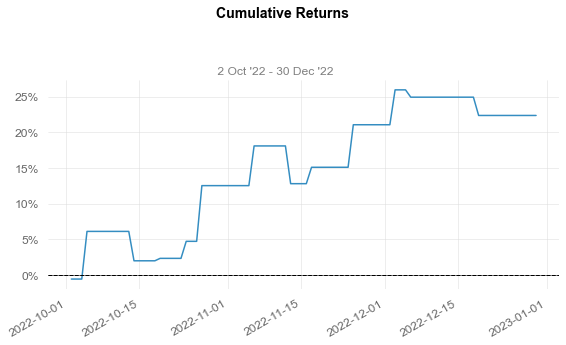

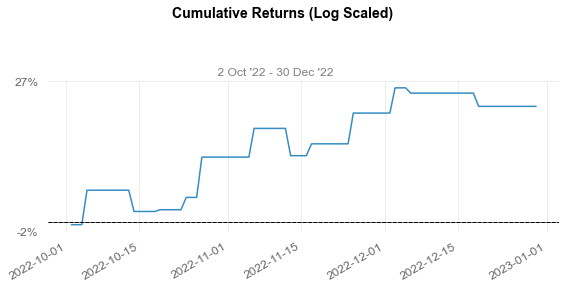

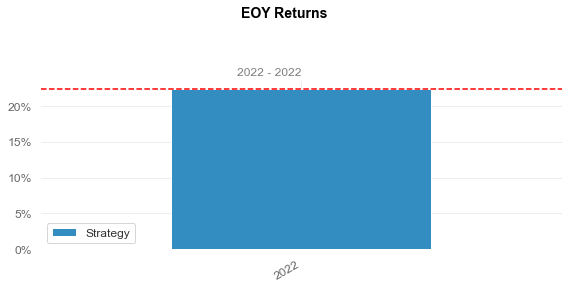

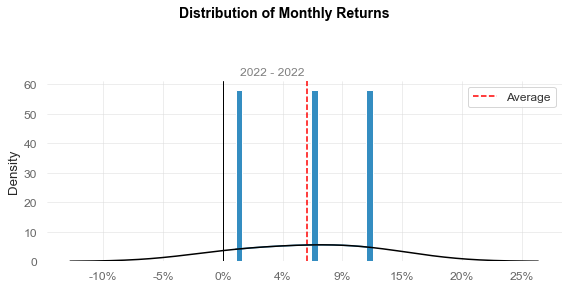

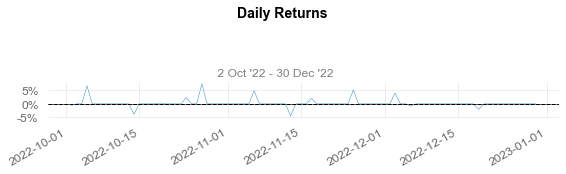

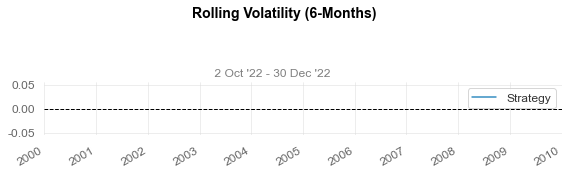

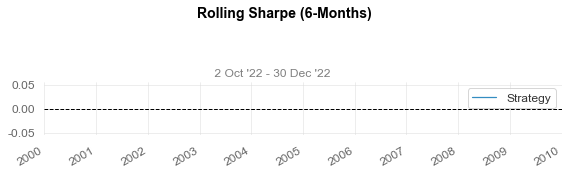

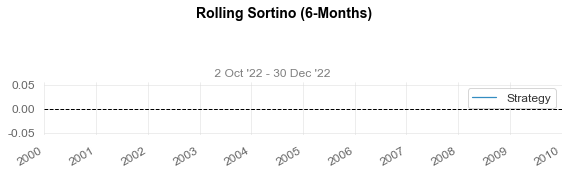

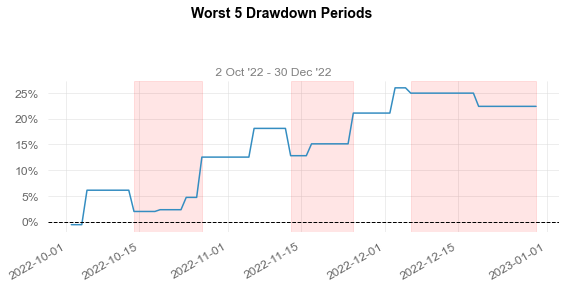

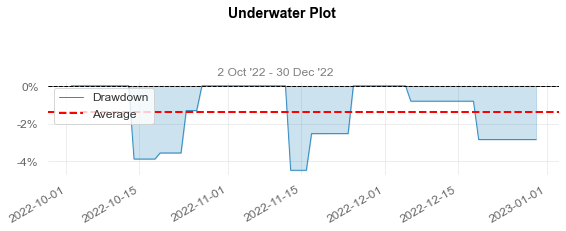

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



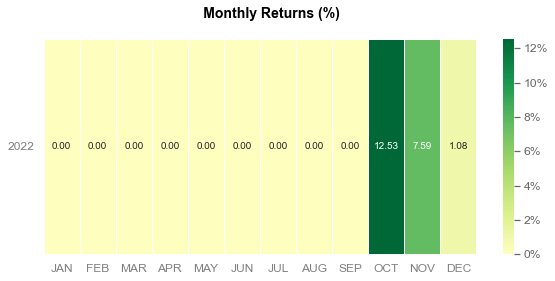

/opt/homebrew/Caskroom/miniforge/base/envs/msc_uol_ai_dissertation/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



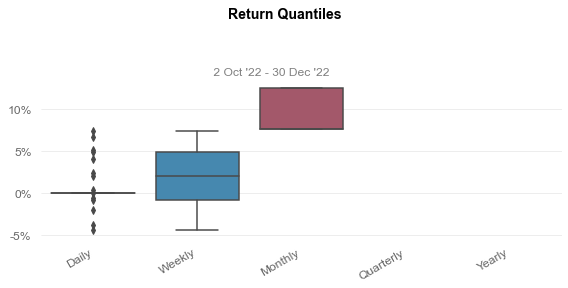

In [41]:
qs.extend_pandas()

df_temp = df_robot_actions_and_env.copy()
df_temp['Date'] = pd.to_datetime(df_temp['dates'])
df_temp.set_index('Date', inplace=True)

net_worth = pd.Series(df_temp['total_profit_percentage'], index=df_temp.index[6:])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)